In [32]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [33]:
img1 = np.array(Image.open('img_1.jpg'))
img2 = np.array(Image.open('img_2.png'))
img3 = np.array(Image.open('img_3.jpg'))

In [34]:
#Função que faz o grayscale usando o método Average
def gray(img):
    (l,c, p) = img.shape
    
    img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(img[i, j, 0])
            g = float(img[i, j, 1])
            b = float(img[i, j, 2])

            img_avg[i, j] = (r+g+b)/3
                
    return img_avg

In [35]:
#Função que fará o filtro de médias
def median_filter(data, kernel_size):

    temp = []
    indexer = kernel_size // 2
    data_final = []
    data_final = np.zeros((len(data), len(data[0])))

    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(kernel_size):

                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:

                    for c in range(kernel_size):

                        temp.append(0)
                
                else:

                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    
                    else:

                        for k in range(kernel_size):
                            temp.append(data[i + z - indexer][j + k - indexer])
            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []

    return data_final

In [36]:
#Aplicando a escala de cinza
img1_gray = gray(img1)
img2_gray = gray(img2)
img3_gray = gray(img3)

In [37]:
#Aplicando o filtro de medias
med1 = median_filter(img1_gray, 3)
med2 = median_filter(img2_gray, 3)
med3 = median_filter(img3_gray, 3)

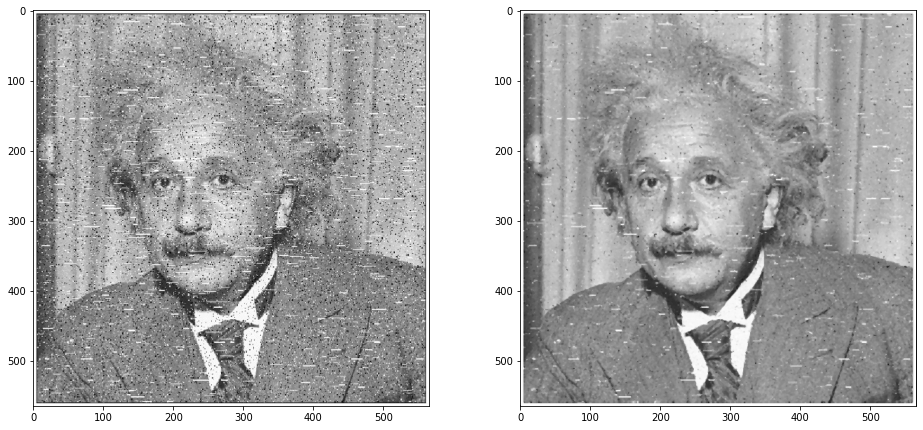

In [38]:
#Plotando a imagem 1 após a retirada do ruído
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(img1_gray, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(med1, cmap='gray')

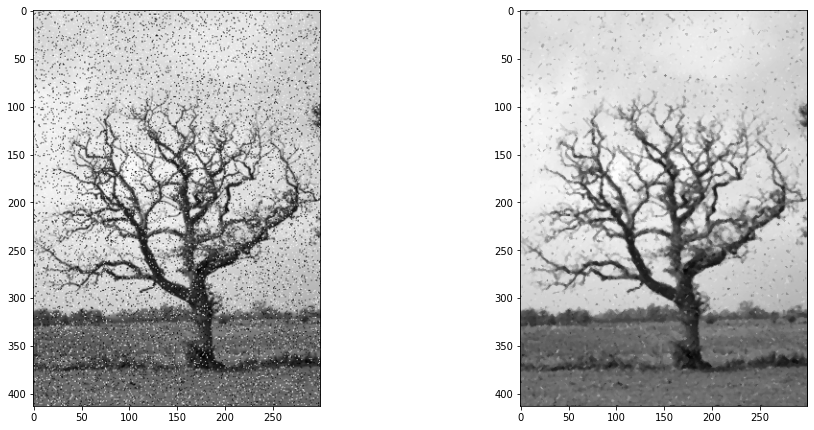

In [39]:
#Plotando a imagem 2 após a retirada do ruído
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(img2_gray, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(med2, cmap='gray')

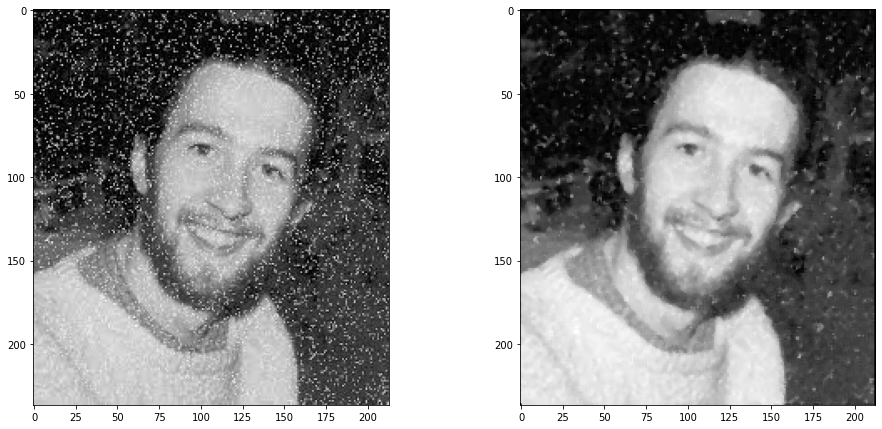

In [40]:
#Plotando a imagem 3 após a retirada do ruído
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(img3_gray, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(med3, cmap='gray')